# Q3  Hierarchical Clustering
1. Cluster the data using any Agglomerative(bottom-up strategy) method of your choice.
2. Cluster the data using any divisive hierarchical clustering method (top-down strategy).
3. Plot a dendrogram for both. Compare the clusters formed by both and analyse the clusters formed.


## Imports

In [1]:
import numpy as np
import matplotlib.pyplot
import pandas as pd
import sklearn.decomposition 
import sklearn.cluster
import scipy.cluster.hierarchy as sch 
import sklearn.metrics 
from Library.divisive import DivisiveClustering

## Getting Data and Headers

In [2]:
dataset = pd.read_csv('../football_data.csv')

#%%
toKeep = np.array([3, 7, 8, 11, 12, 13, 15, 16, 17, 22, 23, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88])
X = dataset.iloc[:,toKeep].values
header = dataset.iloc[:,toKeep].columns


row_length = X.shape[0]
col_length = X.shape[1]
# print(row_length)
# print(col_length)

overview_value_wage_arr = [3,4,X.shape[1]-1]
overview_value_wage_arr = np.array(overview_value_wage_arr)

## Preprocessing Data

In [3]:
'''
Removing Euro, Million, and K sign from wage and values
'''
print("Removing Euro, Million, and K sign from wage and values.")
for j in overview_value_wage_arr:
    for i in range(row_length):
        if type(X[i,j]) is not float:
            last_char = X[i,j][-1]
            if last_char == 'M':
                X[i,j] = 1000000*float(X[i,j][1:-1])
            elif last_char == 'K':
                X[i,j] = 1000*float(X[i,j][1:-1])
            else:
                X[i,j]=0

'''
Extracting year from date
'''
print("Extracting year from date.")
for j in range(10,12):
    for i in range(row_length):
        if type(X[i,j]) is not float:
            year = X[i,j][-4:]
            year = float(year)
            X[i,j] = year

'''
Getting height in inches
'''
print("Getting height in inches.")
for i in range (row_length):
    if type(X[i,12]) is not float:
        hh = X[i,12].split("'")
        ft = float(hh[0])
        ich = float(hh[1])
        ich = ich + 12*ft
        float(ich)
        X[i,12]=ich
      
'''
Extracting weight value by removing "lbs"
'''
print("Extracting weight value by removing lbs.")
for i in range(X.shape[0]):
    if type(X[i,13]) is not float:
        wgt = X[i,13][:-3]
        wgt = float(wgt)
        X[i,13] = wgt
        
'''
Converting all numeric data to float
'''
print("Converting all numeric data to float.")
for i in range(40,col_length-1):
    X[:,i].astype(float)

'''
Removing "+" signs if any
'''
print("Removing + signs if any.")
for j in range(14,40):
    for i in range (row_length):
        if type(X[i,j]) is not float:
            hh = X[i,j].split("+")
            fv = float(hh[0])
            sv = float(hh[1])
            X[i,j]=fv+sv

X=X.astype(float)





import sklearn.impute
impobj = sklearn.impute.SimpleImputer(missing_values = np.nan, strategy = 'mean') 
for j in range(col_length):
    impobj = impobj.fit(X[:, j:j+1])
    X[:, j:j+1] = impobj.transform(X[:, j:j+1])




temp=X
toKeep=np.array([])
for i in range(0,6):
    toKeep=np.append(toKeep,i)
for i in range(12,14):
    toKeep=np.append(toKeep,i)
toKeep=np.append(toKeep,[15,19,27,37])
for i in range(40,75):
    toKeep=np.append(toKeep,i)
toKeep=toKeep.astype(int)

X=X[:,toKeep]
header=header[toKeep]    



np.random.shuffle(X)
import sklearn.preprocessing
X2= sklearn.preprocessing.StandardScaler().fit_transform(X)
graph_data=X
X=X2

print("--------------------")


Removing Euro, Million, and K sign from wage and values.
Extracting year from date.
Getting height in inches.
Extracting weight value by removing lbs.
Converting all numeric data to float.
Removing + signs if any.
--------------------


## Agglomerative

PCA done


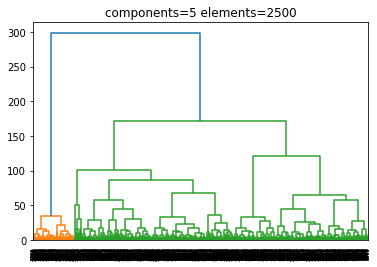

dendrogram done
PCA done


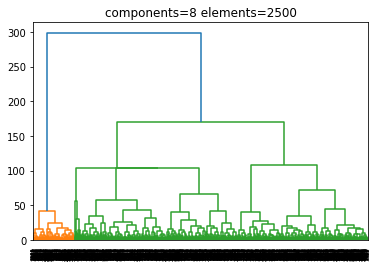

dendrogram done
PCA done


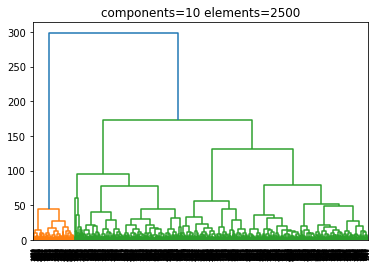

dendrogram done
PCA done


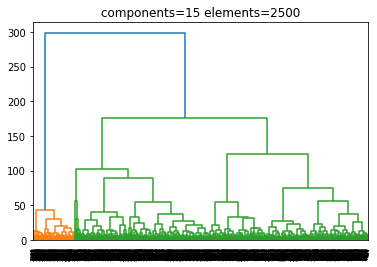

dendrogram done
PCA done


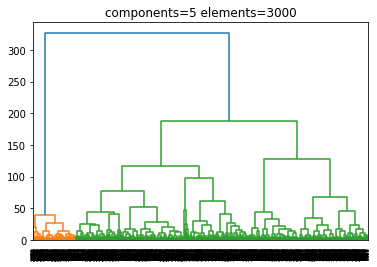

dendrogram done
PCA done


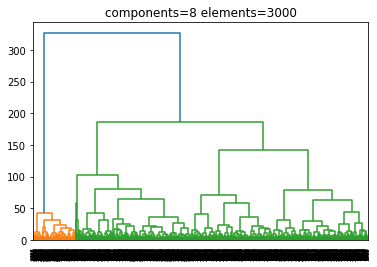

dendrogram done
PCA done


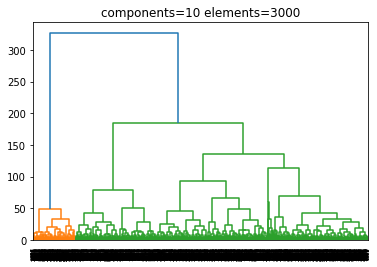

dendrogram done
PCA done


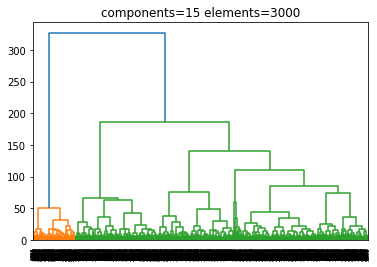

dendrogram done
PCA done


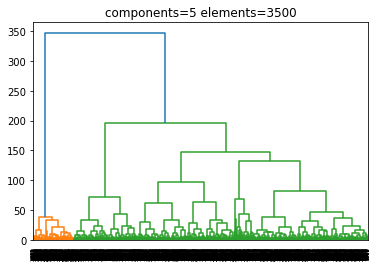

dendrogram done
PCA done


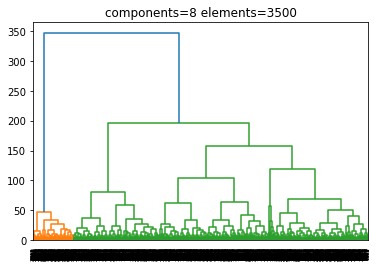

dendrogram done
PCA done


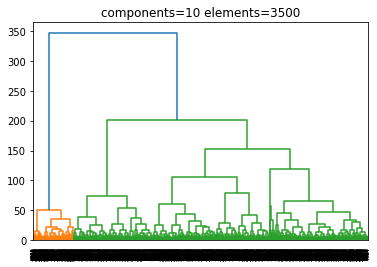

dendrogram done
PCA done


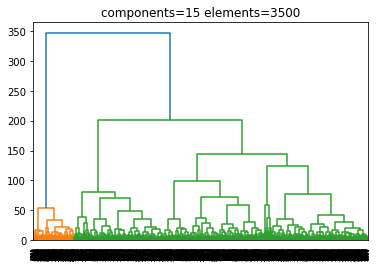

dendrogram done
PCA done


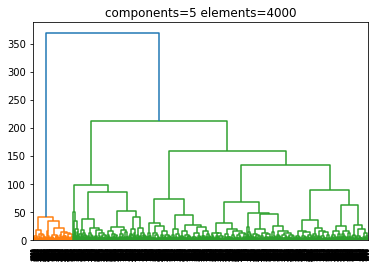

dendrogram done
PCA done


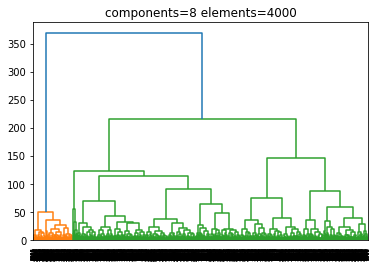

dendrogram done
PCA done


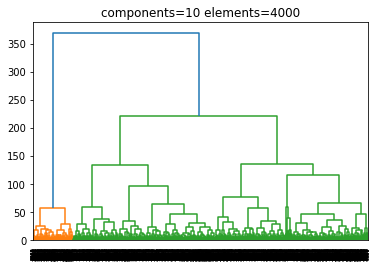

dendrogram done
PCA done


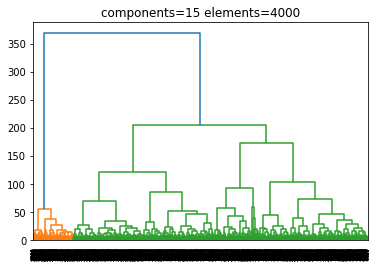

dendrogram done
PCA done


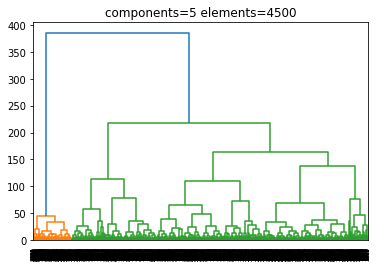

dendrogram done
PCA done


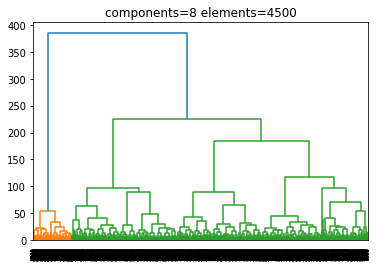

dendrogram done
PCA done


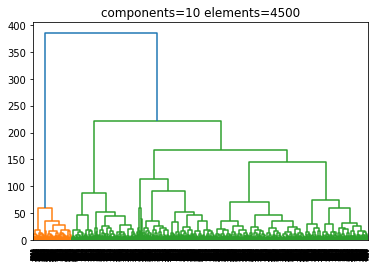

dendrogram done
PCA done


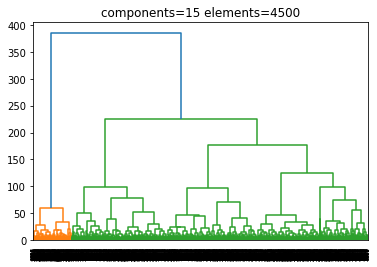

dendrogram done
PCA done


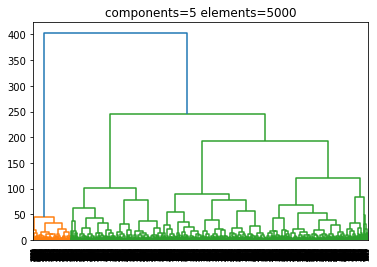

dendrogram done
PCA done


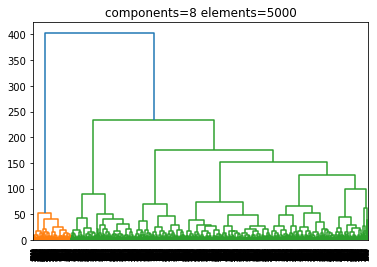

dendrogram done
PCA done


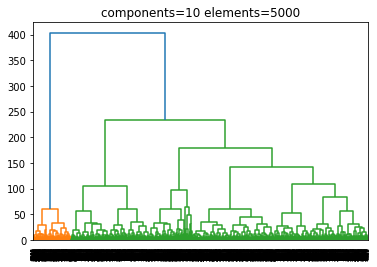

dendrogram done
PCA done


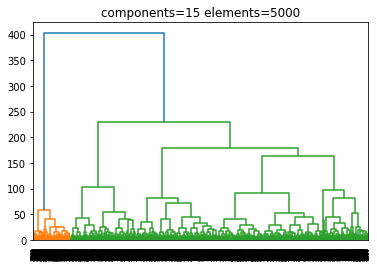

dendrogram done


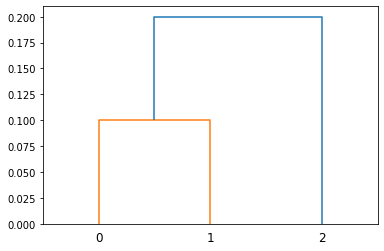

In [4]:
elements=np.array([])
components=np.array([])
clusters=np.array([])
comp = [5,8,10,15]
for n_elements in range(2500,5500,500):
    for n_components in comp:
        
        
        pca = sklearn.decomposition.PCA(n_components = n_components) 
        X2= pca.fit_transform(X) 
        
        print("PCA done")
        
        dendrogram = sch.dendrogram(sch.linkage(X2[:n_elements,:],method='ward'))
        matplotlib.pyplot.title("components="+str(n_components)+" elements="+str(n_elements))
        matplotlib.pyplot.show()
        
        elements=np.append(elements,n_elements)
        components=np.append(components,n_components)
        print("dendrogram done")


clist = ['#3355FF','#FF7733','#FF66E5','#FFFF00','#A9A9A9','#7e52c3']

elements=elements.astype(int)
components=components.astype(int)

stats=[]
for k in range(clusters.shape[0]):
    
    
    n_elements=elements[k]
    n_components=components[k]
    n_clusters=clusters[k]
    
    
    pca = sklearn.decomposition.PCA(n_components = n_components) 
    X2= pca.fit_transform(X) 
        
    hc=sklearn.cluster.AgglomerativeClustering(n_clusters=n_clusters,affinity='euclidean', linkage='ward')
    y_hc=hc.fit_predict(X2[:n_elements,:])
    
    
    data=graph_data[:n_elements,:]
    
    intraClass=0
    interClass=0
    for i in range(n_clusters):
        intraClass+=np.mean(sklearn.metrics.pairwise.pairwise_distances(X[:n_elements,:][y_hc==i],metric='euclidean'))
        for j in range(i+1,n_clusters):
            interClass+=np.mean(sklearn.metrics.pairwise.pairwise_distances(X[:n_elements,:][y_hc==i],X[:n_elements,:][y_hc==j],metric='euclidean'))
    intraClass/=n_clusters
    interClass/=((n_clusters*(n_clusters-1))/2)
    
    for i in [5,8,10,11,45]:
        matplotlib.pyplot.figure()
        for j in range(n_clusters):
            matplotlib.pyplot.scatter(data[y_hc==j][:,1],data[y_hc==j][:,i],color=clist[j])
        matplotlib.pyplot.xlabel(header[1])
        matplotlib.pyplot.ylabel(header[i])
        matplotlib.pyplot.title("clusters="+str(n_clusters)+" PCA_Parameter="+str(n_components))
        matplotlib.pyplot.show()
        
    stats.append([interClass/intraClass,n_clusters,n_components,n_elements])
    print(str(intraClass)+"  "+str(interClass))
    
link=np.array([[0,1,0.1,2],[3,2,0.2,3]])
sch.dendrogram(link)
matplotlib.pyplot.show()

## Getting Data and Headers

In [5]:
dataset = pd.read_csv('../football_data.csv')

#%%
toKeep = np.array([3, 7, 8, 11, 12, 13, 15, 16, 17, 22, 23, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88])
X = dataset.iloc[:,toKeep].values
header = dataset.iloc[:,toKeep].columns


row_length = X.shape[0]
col_length = X.shape[1]
# print(row_length)
# print(col_length)

overview_value_wage_arr = [3,4,X.shape[1]-1]
overview_value_wage_arr = np.array(overview_value_wage_arr)

## Preprocessing Data

In [6]:
'''
Removing Euro, Million, and K sign from wage and values
'''
print("Removing Euro, Million, and K sign from wage and values.")
for j in overview_value_wage_arr:
    for i in range(row_length):
        if type(X[i,j]) is not float:
            last_char = X[i,j][-1]
            if last_char == 'M':
                X[i,j] = 1000000*float(X[i,j][1:-1])
            elif last_char == 'K':
                X[i,j] = 1000*float(X[i,j][1:-1])
            else:
                X[i,j]=0

'''
Extracting year from date
'''
print("Extracting year from date.")
for j in range(10,12):
    for i in range(row_length):
        if type(X[i,j]) is not float:
            year = X[i,j][-4:]
            year = float(year)
            X[i,j] = year

'''
Getting height in inches
'''
print("Getting height in inches.")
for i in range (row_length):
    if type(X[i,12]) is not float:
        hh = X[i,12].split("'")
        ft = float(hh[0])
        ich = float(hh[1])
        ich = ich + 12*ft
        float(ich)
        X[i,12]=ich
      
'''
Extracting weight value by removing "lbs"
'''
print("Extracting weight value by removing lbs.")
for i in range(X.shape[0]):
    if type(X[i,13]) is not float:
        wgt = X[i,13][:-3]
        wgt = float(wgt)
        X[i,13] = wgt
        
'''
Converting all numeric data to float
'''
print("Converting all numeric data to float.")
for i in range(40,col_length-1):
    X[:,i].astype(float)

'''
Removing "+" signs if any
'''
print("Removing + signs if any.")
for j in range(14,40):
    for i in range (row_length):
        if type(X[i,j]) is not float:
            hh = X[i,j].split("+")
            fv = float(hh[0])
            sv = float(hh[1])
            X[i,j]=fv+sv

X=X.astype(float)





import sklearn.impute
impobj = sklearn.impute.SimpleImputer(missing_values = np.nan, strategy = 'mean') 
for j in range(col_length):
    impobj = impobj.fit(X[:, j:j+1])
    X[:, j:j+1] = impobj.transform(X[:, j:j+1])




temp=X
toKeep=np.array([])
for i in range(0,6):
    toKeep=np.append(toKeep,i)
for i in range(12,14):
    toKeep=np.append(toKeep,i)
toKeep=np.append(toKeep,[15,19,27,37])
for i in range(40,75):
    toKeep=np.append(toKeep,i)
toKeep=toKeep.astype(int)

X=X[:,toKeep]
header=header[toKeep]    



np.random.shuffle(X)
import sklearn.preprocessing
X2= sklearn.preprocessing.StandardScaler().fit_transform(X)
graph_data=X
X=X2

print("--------------------")


Removing Euro, Million, and K sign from wage and values.
Extracting year from date.
Getting height in inches.
Extracting weight value by removing lbs.
Converting all numeric data to float.
Removing + signs if any.
--------------------


## Divisive

Clustering done!


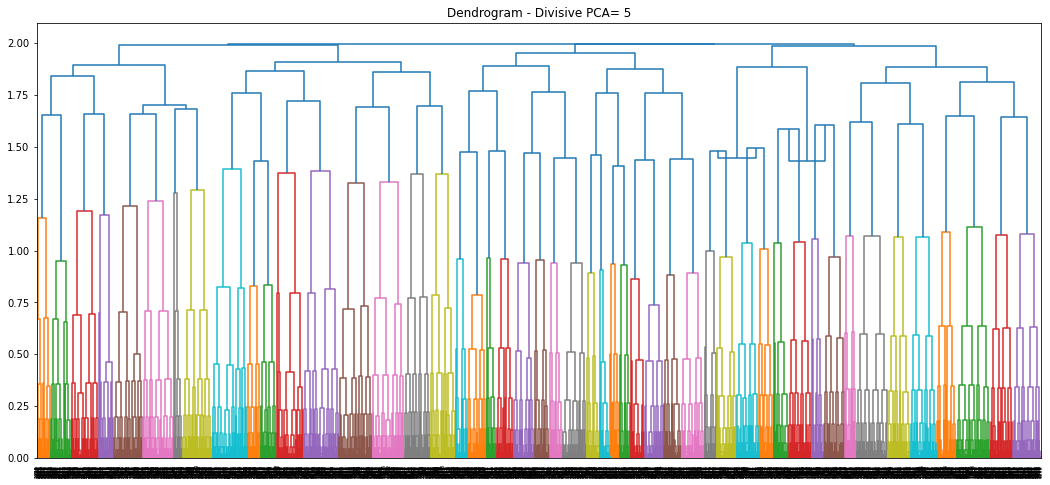

Clustering done!


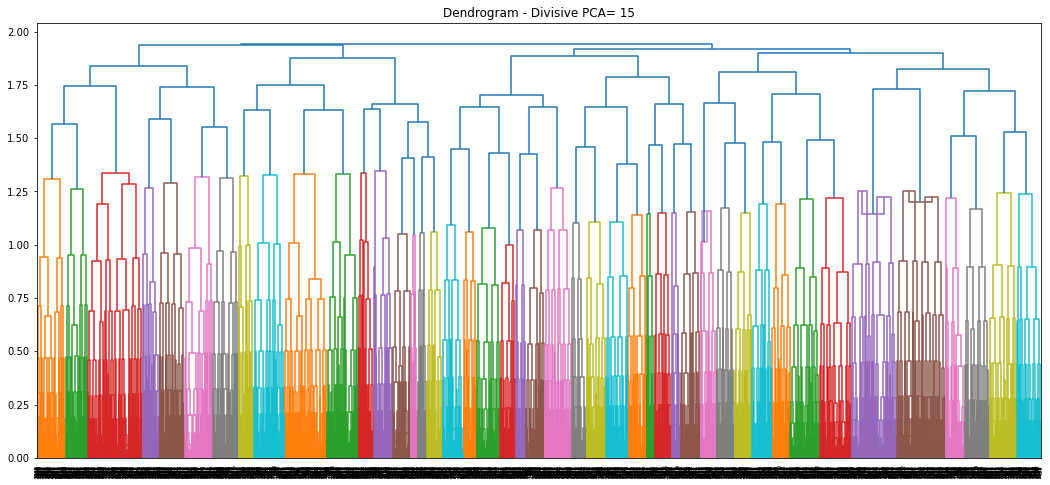

Clustering done!


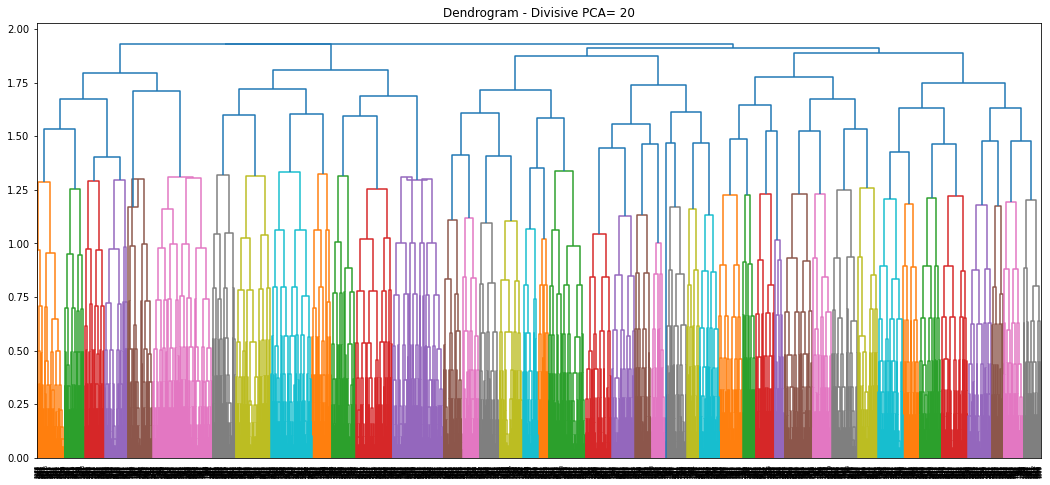

0.727779868252685   0.9863965839556151


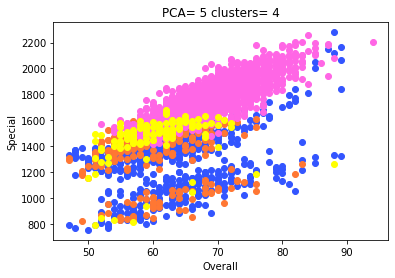

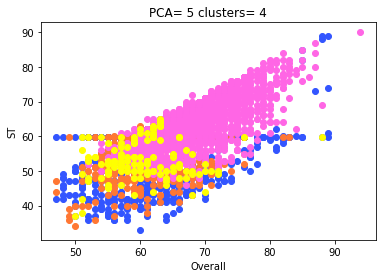

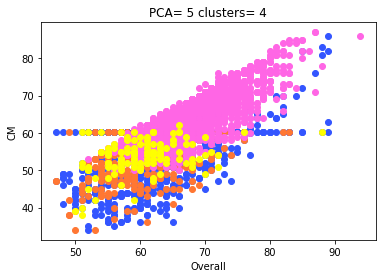

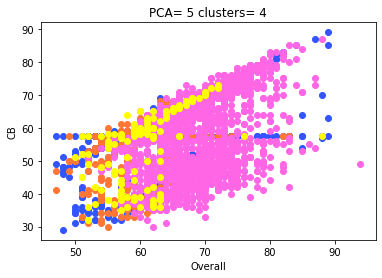

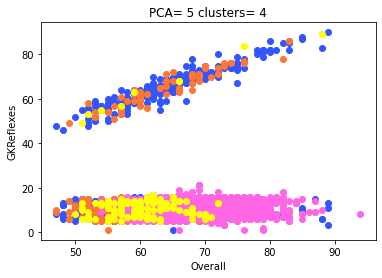

0.7209505733266407   0.9892289457362677


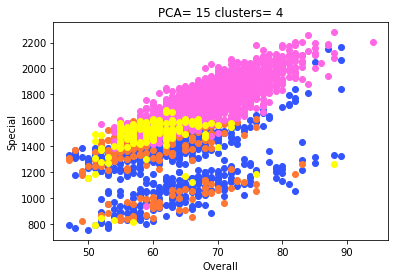

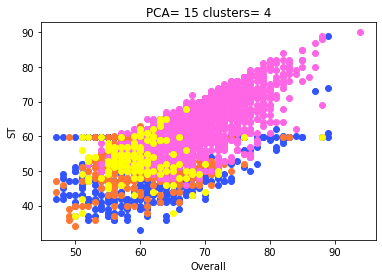

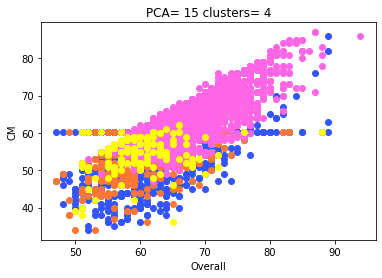

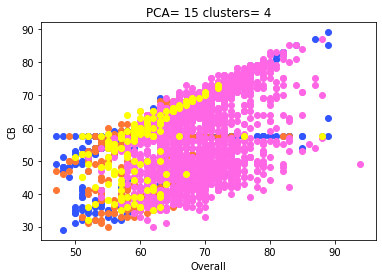

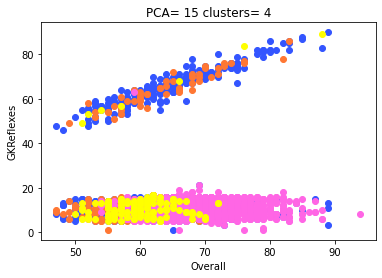

0.7197075753937703   0.9903697292040982


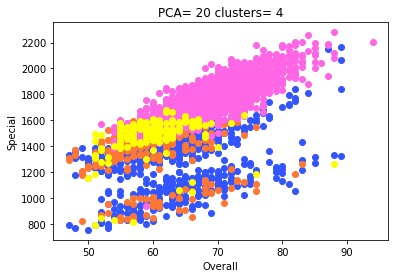

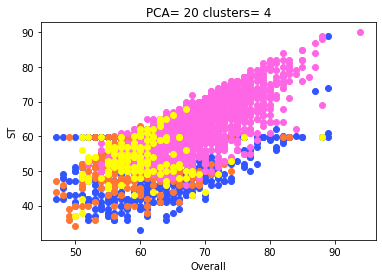

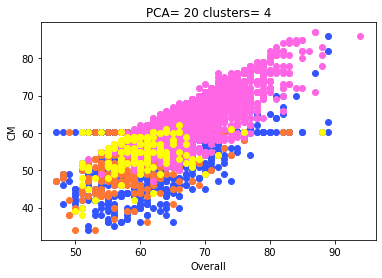

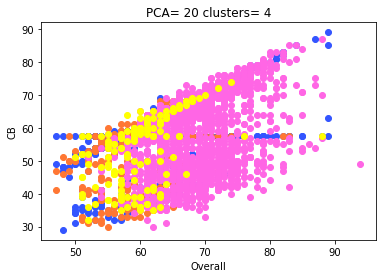

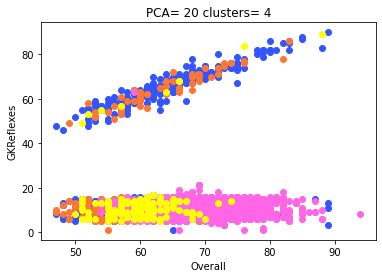

In [7]:

X=X2

fin=[]
components=[5,15,20]
for n_components in components:
    
    pca = sklearn.decomposition.PCA(n_components = n_components) 
    X2= pca.fit_transform(X) 
    
    dist_matrix=sklearn.metrics.pairwise.pairwise_distances(X2[:3000,:],metric='cosine')
    
    
    model=DivisiveClustering()
    model.fit(dist_matrix)
    model.create_dendrogram(n_components)
    
    fin.append(model.hierarchical_clusters)

clusters=[4,4,4]
clist = ['#3355FF','#FF7733','#FF66E5','#FFFF00','#A9A9A9','#7e52c3']
for z in range(len(components)):  
    
    n_components=components[z]
    n_clusters=clusters[z]
    cl=fin[z]['iter_'+str(n_clusters-1)]
    
    intraClass=0
    interClass=0
    for i in cl:
        intraClass+=np.mean(sklearn.metrics.pairwise.pairwise_distances(X[cl[i]],metric='cosine'))
        for j in cl:
            if j<=i:
                continue
            interClass+=np.mean(sklearn.metrics.pairwise.pairwise_distances(X[cl[i]],X[cl[j]],metric='cosine'))
    intraClass/=len(cl)
    interClass/=((len(cl)*(len(cl)-1))/2)
    
    print(str(intraClass)+"   "+str(interClass))
     
    
    for k in [5,8,10,11,45]:
        matplotlib.pyplot.figure()
        i=0
        for j in cl:
            matplotlib.pyplot.scatter(graph_data[cl[j]][:,1],graph_data[cl[j]][:,k],color=clist[i])
            i+=1
        matplotlib.pyplot.xlabel(header[1])
        matplotlib.pyplot.ylabel(header[k])
        matplotlib.pyplot.title("PCA= "+str(n_components)+" clusters= "+str(n_clusters))
        matplotlib.pyplot.show()
